# Playground: Regression with One Explanatory Variable

The purpose of this notebook is to see how a neural network learns the underlying pattern in your data. Note that this application (one explanatory (x) variable to predict a (y) value) is simplified for educational purposes. Traditional nerual network datasets might have hundreds or thousands of predictors (x's) instead of just one to make a prediction.  
This notebook should run with no errors all the way through. After you run all cells once and understand what is happening, try playing around with all the parameters:
   - Add more noise to your data
   - Add more layers... more nodes
   - Change the activation functions in the layers
   - Change the learning rate
   - Change the epochs and the batch size

Data
  - regularization
  - catching irregularities
  - noise in the data  
  
Keras Model Building
  - layers
  - nodes
  - activation functions
Model Compiling
  - learning rate
  - loss functions  
  
Model Training
  - epochs
  - batch size
  - overfitting

In [15]:
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

### Generate Dummy Data

In [16]:
# (NOTE: don't worry about all the transposing. 
#  ... Different functions take different matrix shapes so we have to transpose the shape)
# generate some fake input_data (n data points in range 1 to n with uniform distribution)
num_datapoints = 100
input_data = np.array(range(100)) + np.random.normal(loc=0, scale=3, size=num_datapoints)

# normalize the input_data by transforming each value to its respective zscore
# A zscore is thethe number of standard deviations from the mean a data point is.
# neural networks work much better with these normalized values
norm_data = zscore(input_data.transpose())

In [17]:
# Below are some math functions to make a dummy underlying pattern for the data
# Use one of the following functions by setting 'targets=sin' or 'targets=parabolic'
# You can also define your own math function
# Sidenote: the Universal Aproximation Theorem says that 
# ... "A one layer machine learning model can approximate any function"!
linear = norm_data
parabolic = norm_data**2
sin = np.sin(2*norm_data)
discontinuous = np.array([0 if i > -1  and i < 1 else i*-4 for i in norm_data])

# Set 'targets' to one of the previously defined functions
targets = sin

In [18]:
# Add some noise (as all data has). Pick noise values between 0-1
noise = .5
targets = targets.transpose() + np.random.normal(loc=0.0, scale=noise, size=num_datapoints)

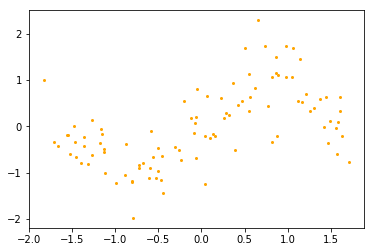

In [19]:
# Reshape your data to feed into the model
norm_data = np.array([[i] for i in norm_data])
targets = np.array([[i] for i in targets])

# Plot the data
plt.plot(norm_data, targets, 'ro', markersize=2, color="orange")

### Return a Built and Compiled Model

In [20]:
# Return a built and compiled model
# n_cols: number of explanatory features you're planning to feed into the model
# inside this function, you can adjust the number of layers, 
# ... nodes per layer, activation functions, optimizer type,
def get_regression_model(n_cols):
    # Set up a sequential (feed-forward) model
    model = Sequential()

    # Add a hidden layer. First layer must declare input shape being the number of features you're feeding into it
    model.add(Dense(8, activation='tanh', input_shape=(n_cols,)))

    # Add a hidden layer. Try different activation functions. Try different number of nodes.
    model.add(Dense(4, activation='elu'))

    # Add the output layer. Only 1 node for regression models. No activation function.
    model.add(Dense(1))

    # Use the SGD optimizer and mean_squared_error loss function
    # ... try other optimizers like "adam" by setting optimizer="adam"
    # ... try other loss functions (https://keras.io/losses/)
    SGD = keras.optimizers.sgd(lr=.03)
    model.compile(optimizer=SGD, loss='mse', metrics=["mse"])

    # return the model built and compiled
    return model

### Build the Keras Neural Network Model

### Fit the model

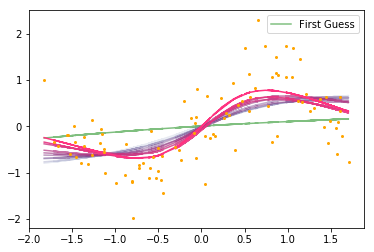

In [21]:
# get a new regression model: model
model = get_regression_model(1)

# start a lof of the mean squared error: log
log = {"mse":[]}

# set the number of rounds to train (each round will be multiple epochs)
training_iterations = 10

# fit your model once to see what the model guesses (in green) after one try through your data
history = model.fit(norm_data, targets, epochs=1, verbose=0)
log["mse"].extend(history.history['mean_squared_error'])
predictions = model.predict(norm_data)
plt.plot(norm_data, predictions, alpha=.5, color="green")
plt.legend(['First Guess'], loc='best')


# then run through your data 'training_iterations' more times
for i in range(training_iterations):
    # at each iteration, record the history of how your models performance
    history = model.fit(norm_data, targets, epochs=5, batch_size=10, verbose=0)
    
    # save that history to a log for later use
    log["mse"].extend(history.history['mean_squared_error'])
    
    # have the model make predictions off of your normalized input data
    predictions = model.predict(norm_data)
    
    # alpha is just a coefficient between 0-1 that will be used to set the color and opacity of the plot
    alpha = (i+1)/training_iterations
    
    # add a plot to the figure of what your machine guessed for your input data after this iteration
    # "earlier" guesses will be more faded while "later" guesses will be more vivid
    plt.plot(norm_data, predictions, alpha=alpha, color=(alpha, 0.2, 0.5))

# add the plot of the initial input data to the figure
plt.plot(norm_data, targets, 'ro', markersize=2, color="orange")
# show the figure
plt.show()

### Access Model Performance

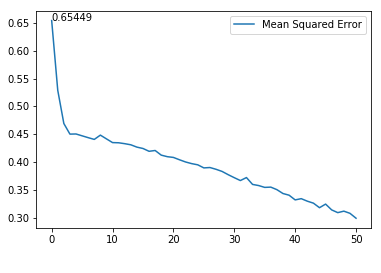

In [23]:
# now access how your model did on the training data after each iteration by graphing the 'Mean Squared Error'
first_loss = round(log["mse"][0], 5)
final_loss = round(log["mse"][-1], 5)
plt.plot(log["mse"])
plt.annotate(first_loss,(0,log["mse"][0]))
plt.annotate(final_loss,(num_datapoints,log["mse"][-1]))
plt.legend(['Mean Squared Error'], loc='best')
plt.show()